***Импортируем необходимые библиотеки для выполнения задачи***

In [ ]:
import os
import time
import json
import requests
import random
import numpy as np
import pandas as pd
from glob import glob
import cv2
import seaborn as sns
from PIL import Image
import matplotlib.pylab as plt

***Загрузим csv-файл, полученный от двух одноклассников***

df_1:

> `Имя файла: Image_annotator_1`  
> `Общ. кол-во размеченных изображений: 68`  
> `Сделал: Чжан`  

df_2:

> `Имя файла: Image_annotator_2`  
> `Общ. кол-во размеченных изображений: 68`   
> `Сделал: Дональд`


In [ ]:
df_1 = pd.read_csv(r"C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\Image_annotator_1.csv")
df_2 = pd.read_csv(r"C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\Image_annotator_2.csv")

df_1.shape, df_2.shape

((71, 7), (67, 7))

***Сразу видно, что существует разница между двумя csv-файлами, которые они мне вернули***

***Ну ничего страшного, давайте продолжим***

In [ ]:
df_1.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,page_1_image_4.jpg,108133,{},1,0,"{""name"":""rect"",""x"":126,""y"":31,""width"":274,""hei...","{""labels"":""dog""}"
1,page_1_image_5.jpg,80974,{},1,0,"{""name"":""rect"",""x"":134,""y"":84,""width"":173,""hei...","{""labels"":""dog""}"
2,page_1_image_7.jpg,23132,{},1,0,"{""name"":""rect"",""x"":62,""y"":136,""width"":300,""hei...","{""labels"":""dog""}"
3,page_1_image_8.jpg,70456,{},1,0,"{""name"":""rect"",""x"":3,""y"":0,""width"":538,""height...","{""labels"":""dog""}"
4,page_1_image_9.jpg,53020,{},1,0,"{""name"":""rect"",""x"":281,""y"":108,""width"":250,""he...","{""labels"":""dog""}"


In [ ]:
df_2.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,page_1_image_4.jpg,108133,{},1,0,"{""name"":""rect"",""x"":135,""y"":30,""width"":264,""hei...","{""labels"":""dog""}"
1,page_1_image_5.jpg,80974,{},1,0,"{""name"":""rect"",""x"":158,""y"":85,""width"":133,""hei...","{""labels"":""dog""}"
2,page_1_image_7.jpg,23132,{},1,0,"{""name"":""rect"",""x"":74,""y"":138,""width"":288,""hei...","{""labels"":""dog""}"
3,page_1_image_8.jpg,70456,{},1,0,"{""name"":""rect"",""x"":194,""y"":1,""width"":346,""heig...","{""labels"":""dog""}"
4,page_1_image_9.jpg,53020,{},1,0,"{""name"":""rect"",""x"":281,""y"":111,""width"":247,""he...","{""labels"":""dog""}"


In [ ]:
print(df_1['region_shape_attributes'][0], df_1['region_attributes'][0])
print(df_2['region_shape_attributes'][0], df_2['region_attributes'][0])

{"name":"rect","x":126,"y":31,"width":274,"height":246} {"labels":"dog"}
{"name":"rect","x":135,"y":30,"width":264,"height":247} {"labels":"dog"}


***Давайте разберемся со столбцами в двух csv-файлах, извлечем необходимые атрибуты из помеченных изображений***

***df_1***

In [ ]:
# folder_path
folder_path = r'C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_labeled_1'

# Parse JSON columns
df_1['region_shape_attributes'] = df_1['region_shape_attributes'].apply(json.loads)
df_1['region_attributes'] = df_1['region_attributes'].apply(json.loads)

# Extract key-value pairs
df_1['file_name'] = df_1['filename']
df_1['x'] = df_1['region_shape_attributes'].apply(lambda x: x['x'])
df_1['y'] = df_1['region_shape_attributes'].apply(lambda x: x['y'])
df_1['width'] = df_1['region_shape_attributes'].apply(lambda x: x['width'])
df_1['height'] = df_1['region_shape_attributes'].apply(lambda x: x['height'])
df_1['labels'] = df_1['region_attributes'].apply(lambda x: x['labels'])
df_1['file_path'] = df_1['file_name'].apply(lambda x: os.path.join(folder_path, x))

# Select the desired columns
df_1 = df_1[['file_name', 'region_count', 'region_id', 'x', 'y', 'width', 'height', 'labels', 'file_path']]
df_1

,file_name,region_count,region_id,x,y,width,height,labels,file_path
0,page_1_image_4.jpg,1,0,126,31,274,246,dog,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
1,page_1_image_5.jpg,1,0,134,84,173,255,dog,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
2,page_1_image_7.jpg,1,0,62,136,300,246,dog,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
3,page_1_image_8.jpg,1,0,3,0,538,383,dog,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
4,page_1_image_9.jpg,1,0,281,108,250,274,dog,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
...,...,...,...,...,...,...,...,...,...
66,page_20_image_29.jpg,1,0,3,0,427,381,cat,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
67,page_20_image_30.jpg,1,0,151,53,424,293,cat,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
68,page_20_image_32.jpg,1,0,123,45,259,191,cat,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
69,page_20_image_33.jpg,1,0,33,37,413,280,cat,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...


***df_2***

In [ ]:
# folder_path
folder_path = r'C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_labeled_2'

# Parse JSON columns
df_2['region_shape_attributes'] = df_2['region_shape_attributes'].apply(json.loads)
df_2['region_attributes'] = df_2['region_attributes'].apply(json.loads)

# Extract key-value pairs
df_2['file_name'] = df_2['filename']
df_2['x'] = df_2['region_shape_attributes'].apply(lambda x: x['x'])
df_2['y'] = df_2['region_shape_attributes'].apply(lambda x: x['y'])
df_2['width'] = df_2['region_shape_attributes'].apply(lambda x: x['width'])
df_2['height'] = df_2['region_shape_attributes'].apply(lambda x: x['height'])
df_2['labels'] = df_2['region_attributes'].apply(lambda x: x['labels'])
df_2['file_path'] = df_2['file_name'].apply(lambda x: os.path.join(folder_path, x))

# Select the desired columns
df_2 = df_2[['file_name', 'region_count', 'region_id', 'x', 'y', 'width', 'height', 'labels', 'file_path']]
df_2

,file_name,region_count,region_id,x,y,width,height,labels,file_path
0,page_1_image_4.jpg,1,0,135,30,264,247,dog,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
1,page_1_image_5.jpg,1,0,158,85,133,257,dog,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
2,page_1_image_7.jpg,1,0,74,138,288,244,dog,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
3,page_1_image_8.jpg,1,0,194,1,346,380,dog,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
4,page_1_image_9.jpg,1,0,281,111,247,270,dog,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
...,...,...,...,...,...,...,...,...,...
62,page_20_image_29.jpg,1,0,94,1,324,335,cat,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
63,page_20_image_30.jpg,1,0,153,53,374,292,cat,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
64,page_20_image_32.jpg,1,0,123,50,246,183,cat,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
65,page_20_image_33.jpg,1,0,100,38,252,270,cat,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...


***Давайте сравним столбцы "region_count", "region_id" и "labels" в двух csv-файлах***
*   ***region_count: Общ. кол-во размеченных района на изображении***
*   ***region_id: ID размеченных района (начиная с 0)***
*   ***labels: Метка размеченного объекта (в моем наборе изображений должны быть "cat" и "dog")***

In [ ]:
print('df_1:\n', df_1['region_count'].value_counts(), '\n' + '-' * 30 + '\n', 'df_2:\n', df_2['region_count'].value_counts(), sep='')


df_1:
region_count
1    65
2     6
Name: count, dtype: int64
------------------------------
df_2:
region_count
1    65
2     2
Name: count, dtype: int64


In [ ]:
print('df_1:\n', df_1['region_id'].value_counts(), '\n' + '-' * 30 + '\n', 'df_2:\n', df_2['region_id'].value_counts(), sep='')

df_1:
region_id
0    68
1     3
Name: count, dtype: int64
------------------------------
df_2:
region_id
0    66
1     1
Name: count, dtype: int64


In [ ]:
print('df_1:\n', df_1['labels'].value_counts(), '\n' + '-' * 30 + '\n', 'df_2:\n', df_2['labels'].value_counts(), sep='')

df_1:
labels
cat      35
dog      34
dog_1     1
dog_2     1
Name: count, dtype: int64
------------------------------
df_2:
labels
cat     33
dog     32
dog1     1
dog2     1
Name: count, dtype: int64


***Давайте проверим, существует ли изображения с дублирующимися путями в df_1***

In [ ]:
duplicates_df_1 = df_1.groupby('file_path').filter(lambda x: len(x) > 1)
duplicates_df_1

,file_name,region_count,region_id,x,y,width,height,labels,file_path
13,page_2_image_5.jpg,2,0,0,-1,240,279,dog,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
14,page_2_image_5.jpg,2,1,313,53,193,163,cat,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
15,page_2_image_6.jpg,2,0,99,27,149,261,cat,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
16,page_2_image_6.jpg,2,1,244,63,193,239,dog,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
26,page_4_image_24.jpg,2,0,388,37,187,159,dog_1,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
27,page_4_image_24.jpg,2,1,168,201,383,133,dog_2,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...


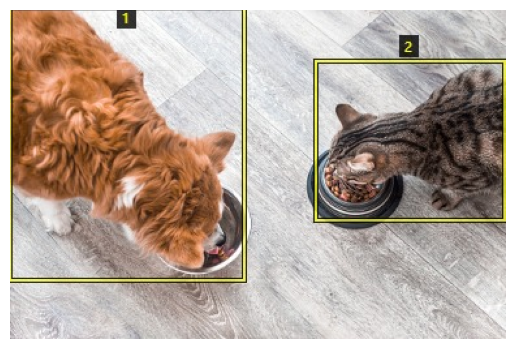

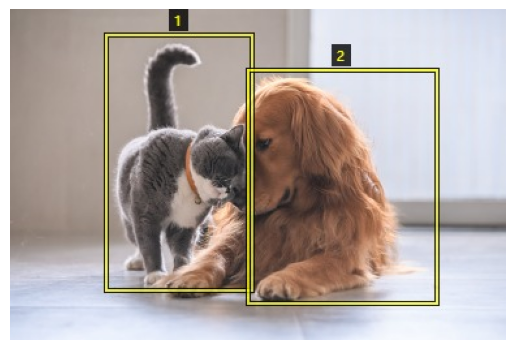

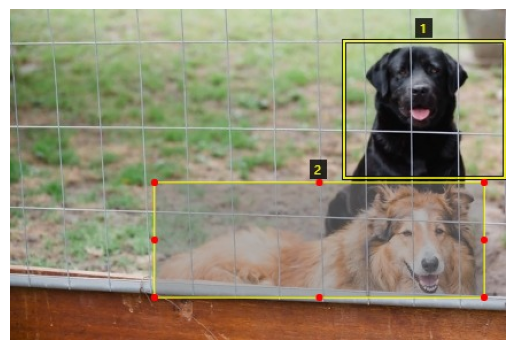

In [ ]:
# Get rows that meet the condition
check_1 = df_1.groupby('file_path').filter(lambda x: len(x) > 1)

# Keep track of displayed file paths to avoid duplicates
displayed_file_paths = set()

# Iterate over each row, read the corresponding image and display it in VS Code output
for index, row in check_1.iterrows():
    file_path = row['file_path']

    # Check if the file path has already been displayed
    if file_path not in displayed_file_paths:
        # Open the image using PIL
        image = Image.open(file_path)

        # Display the image in the VS Code output without axis labels
        plt.imshow(image)
        plt.axis('off')  # Turn off axis labels
        plt.show()

        # Add the file path to the set of displayed file paths
        displayed_file_paths.add(file_path)

***Как видно, первый разметчик все еще спокойно разметил соответствующие объекты при наличии двух или более объектов на изображении, и не удалил их.***

***То же самое, давайте проверим df_2***

In [ ]:
duplicates_df_2 = df_2.groupby('file_path').filter(lambda x: len(x) > 1)
duplicates_df_2

,file_name,region_count,region_id,x,y,width,height,labels,file_path
22,page_4_image_24.jpg,2,0,410,38,125,158,dog1,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
23,page_4_image_24.jpg,2,1,362,202,183,130,dog2,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...


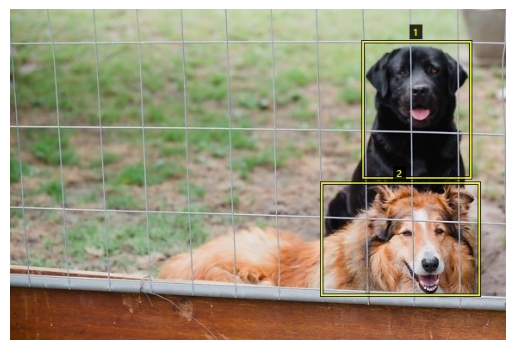

In [ ]:
# Get rows that meet the condition
check_2 = df_2.groupby('file_path').filter(lambda x: len(x) > 1)

# Keep track of displayed file paths to avoid duplicates
displayed_file_paths = set()

# Iterate over each row, read the corresponding image and display it in VS Code output
for index, row in check_2.iterrows():
    file_path = row['file_path']

    # Check if the file path has already been displayed
    if file_path not in displayed_file_paths:
        # Open the image using PIL
        image = Image.open(file_path)

        # Display the image in the VS Code output without axis labels
        plt.imshow(image)
        plt.axis('off')  # Turn off axis labels
        plt.show()

        # Add the file path to the set of displayed file paths
        displayed_file_paths.add(file_path)

***Получается, что когда второй разметчик разметил изображение, он удалил изображения с разными объектами (т.е. содержит и кошку, и собаку), а сохранил изображения с одинаковыми объектами (т.е. с двумя собаками).***

***В целом, наши два разметчика получили отличные результаты.***   
***У каждого из них были свои идеи при работе с разметкой изображений, и не допустили никаких серьезных ошибок в разметке.***  
***В итоге, я решил использовать данные из первого разметчика (т.е. df_1), так как в нем содержится больше информации и он более полный.***

In [ ]:
df_1

,file_name,region_count,region_id,x,y,width,height,labels,file_path
0,page_1_image_4.jpg,1,0,126,31,274,246,dog,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
1,page_1_image_5.jpg,1,0,134,84,173,255,dog,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
2,page_1_image_7.jpg,1,0,62,136,300,246,dog,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
3,page_1_image_8.jpg,1,0,3,0,538,383,dog,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
4,page_1_image_9.jpg,1,0,281,108,250,274,dog,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
...,...,...,...,...,...,...,...,...,...
66,page_20_image_29.jpg,1,0,3,0,427,381,cat,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
67,page_20_image_30.jpg,1,0,151,53,424,293,cat,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
68,page_20_image_32.jpg,1,0,123,45,259,191,cat,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
69,page_20_image_33.jpg,1,0,33,37,413,280,cat,C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\🐱🐶_l...
